#Model Building










#**Data Collection**



In [1]:
# Extract zip Folder

!unzip '/content/Dataset.zip'

Archive:  /content/Dataset.zip
  inflating: Dataset/test/1/3.jpg    
  inflating: Dataset/test/3/2.jpg    
  inflating: Dataset/test/5/1.jpg    
  inflating: Dataset/test/2/2.jpg    
  inflating: Dataset/test/3/1.jpg    
  inflating: Dataset/test/5/2.jpg    
  inflating: Dataset/test/5/0.jpg    
  inflating: Dataset/test/1/1.jpg    
  inflating: Dataset/test/5/4.jpg    
  inflating: Dataset/test/0/3.jpg    
  inflating: Dataset/test/2/0.jpg    
  inflating: Dataset/test/3/3.jpg    
  inflating: Dataset/test/0/2.jpg    
  inflating: Dataset/test/1/2.jpg    
  inflating: Dataset/test/1/4.jpg    
  inflating: Dataset/test/4/4.jpg    
  inflating: Dataset/test/3/0.jpg    
  inflating: Dataset/test/1/0.jpg    
  inflating: Dataset/test/3/4.jpg    
  inflating: Dataset/test/2/1.jpg    
  inflating: Dataset/test/4/2.jpg    
  inflating: Dataset/test/5/3.jpg    
  inflating: Dataset/test/2/4.jpg    
  inflating: Dataset/test/4/3.jpg    
  inflating: Dataset/test/0/1.jpg    
  inflating: Datase

In [2]:
from keras.preprocessing.image import ImageDataGenerator


#Define the parameters/arguments for ImageDataGenertor Class

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)


#Applying ImageDataGenerator functionality to trainset and testset

In [4]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [5]:
x_train=train_datagen.flow_from_directory(r'/content/Dataset/train',target_size=(64,64),batch_size=32,color_mode='grayscale',class_mode='categorical')
x_test=train_datagen.flow_from_directory(r'/content/Dataset/test',target_size=(64,64),batch_size=32,color_mode='grayscale',class_mode='categorical')


Found 594 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


#**Model Building**


#Importing necessary libraries






In [6]:
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D

#Initializing The Model

In [7]:
model=Sequential()

#Adding CNN Layers

In [8]:
model.add(Conv2D(32,(3,3),input_shape=(64,64,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

#Adding Dense Layer

In [9]:
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=6,activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

#Configure The Learning Process

In [11]:
#Compiling the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#Train The Model

In [13]:
#Fitting the model
model.fit_generator(
    generator=x_train,steps_per_epoch=len(x_train),
    epochs=20,validation_data=x_test,validation_steps=len(x_test))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


19/19 [==============================] - 3s 155ms/step - loss: 1.2034 - accuracy: 0.5791 - val_loss: 0.8472 - val_accuracy: 0.7000
Epoch 2/20
19/19 [==============================] - 3s 155ms/step - loss: 0.7949 - accuracy: 0.6801 - val_loss: 0.6401 - val_accuracy: 0.8000
Epoch 3/20
19/19 [==============================] - 3s 149ms/step - loss: 0.6932 - accuracy: 0.7256 - val_loss: 0.5726 - val_accuracy: 0.8333
Epoch 4/20
19/19 [==============================] - 3s 143ms/step - loss: 0.5207 - accuracy: 0.8098 - val_loss: 0.4732 - val_accuracy: 0.8667
Epoch 5/20
19/19 [==============================] - 3s 153ms/step - loss: 0.4048 - accuracy: 0.8519 - val_loss: 0.5441 - val_accuracy: 0.8333
Epoch 6/20
19/19 [==============================] - 3s 153ms/step - loss: 0.3384 - accuracy: 0.8906 - val_loss: 0.3888 - val_accuracy: 0.8667
Epoch 7/20
19/19 [==============================] - 3s 149ms/step - loss: 0.3458 - accuracy: 0.8603 - val_loss: 0.4331 - val_accuracy: 0.8667
Epoch 8/20
19/19 

#Save The Model

In [16]:
#Saving our model
model.save('gesture.h5')
model_json=model.to_json()
with open("model-bw.json","w") as json_file:
  json_file.write(model_json)

In [14]:
model.save('gesture.h5')

In [15]:
 !tar -zcvf gesture-classification.tgz gesture.h5

gesture.h5


#Test The Model

In [17]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
test_model=load_model('gesture.h5')

In [18]:
img=image.load_img('/content/Dataset/test/0/0.jpg',target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
predict_x=(model.predict(x_test)>0.5).astype("int64")
pred=np.argmax(predict_x,axis=-1)
pred

1/1 [==============================] - 0s 190ms/step


array([5, 3, 1, 4, 2, 1, 4, 3, 0, 0, 5, 0, 2, 1, 5, 1, 1, 4, 5, 5, 4, 0,
       2, 4, 3, 2, 0, 3, 1, 3])

In [19]:
img=image.load_img('/content/Dataset/test/5/1.jpg',target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
predict_x=model.predict(x_test)
classes_x=np.argmax(predict_x,axis=1)
classes_x
predict_x

1/1 [==============================] - 0s 98ms/step


array([[1.14077750e-06, 6.51529945e-06, 5.84117547e-02, 9.39423084e-01,
        2.15093698e-03, 6.51050414e-06],
       [8.83148772e-08, 3.01933358e-03, 9.89483178e-01, 7.49291806e-03,
        4.51865662e-06, 4.91587500e-08],
       [1.64210316e-08, 9.21614992e-04, 9.98041809e-01, 1.03652873e-03,
        2.66796505e-08, 2.60780251e-08],
       [5.96133384e-17, 4.24831492e-17, 5.24744039e-13, 1.49957907e-06,
        4.70447680e-03, 9.95294034e-01],
       [2.47847510e-07, 2.17215486e-07, 1.58745737e-03, 9.63600874e-01,
        3.47275622e-02, 8.35159808e-05],
       [2.96060462e-03, 9.96243119e-01, 9.25057975e-05, 7.03452446e-04,
        3.28091801e-07, 6.18951557e-10],
       [1.51958033e-14, 1.44867520e-14, 1.09863385e-09, 2.05297465e-03,
        9.94576573e-01, 3.37034301e-03],
       [9.99999940e-01, 5.85315174e-09, 1.08309011e-12, 3.34090338e-08,
        2.87948954e-08, 5.29710853e-09],
       [7.90452556e-13, 2.09081907e-09, 9.69014247e-04, 9.85966086e-01,
        1.30563919e-02, 

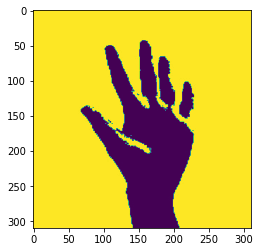

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/Dataset/test/5/2.jpg')
imgplot=plt.imshow(img)
plt.show()

In [ ]:
imgload=image.load_img('/content/Dataset/test/5/4.jpg',color_mode='grayscale',target_size=(64,64))
res=image.img_to_array(imgload)
res.shape


(64, 64, 1)

In [ ]:
type(res)

numpy.ndarray

In [ ]:
res=np.expand_dims(res,axis=0)
res.shape

(1, 64, 64, 1)

#Predict the result

In [ ]:
pred_res=np.argmax(test_model.predict(res),axis=-1)
pred_res

1/1 [==============================] - 0s 49ms/step


array([4])

In [ ]:
index=['0','1','2','3','4','5']
result=str(index[pred_res[0]])
result

'4'

#IBM Deployment




In [ ]:
!pip install watson-machine-learning-client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 538 kB 32.6 MB/s 
     |████████████████████████████████| 55 kB 5.1 MB/s 
     |████████████████████████████████| 132 kB 92.8 MB/s 
     |████████████████████████████████| 79 kB 10.3 MB/s 
     |████████████████████████████████| 9.9 MB 58.6 MB/s 
     |████████████████████████████████| 140 kB 75.3 MB/s 
     |████████████████████████████████| 956 kB 98.3 MB/s 
     |████████████████████████████████| 135 kB 90.9 MB/s 
     |████████████████████████████████| 62 kB 1.8 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.12.0-py3-none-any.whl size=73931 sha256=021a72d72819423250509f7f1b552db060dba428c9a2650bdeb60d15b0cf04ba
  Stored in directory: /root/.cache/pip/wheels/ec/94/29/2b57327cf00664b6614304f7958abd29d77ea0e5bbece2ea57
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.12.0-py3-none-any.whl size=562962 sha256=ed06f1ce5

In [ ]:
!pip install ibm_watson_machine_learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 28.0 MB/s 
     |████████████████████████████████| 51 kB 730 kB/s 
     |████████████████████████████████| 824 kB 58.1 MB/s 
     |████████████████████████████████| 133 kB 87.5 MB/s 
     |████████████████████████████████| 547 kB 90.9 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.7.0-py2.py3-none-any.whl size=72563 sha256=cd2d8a22b4f28d9efcc44473251afa8d1ee1700b6d5fb723a00a9346c30c4709
  Stored in directory: /root/.cache/pip/wheels/47/22/bf/e1154ff0f5de93cc477acd0ca69abfbb8b799c5b28a66b44c2
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.7.0-py2.py3-none-any.whl size=501013 sha256=0a3368f332e9e39decd67c595a1e0fb468e64f239762af10a7966455c8e87201
  Stored in directory: /root/.cache/pip/wheels/6c/a2/e4/c16d02f809a3ea998e17cfd02c13369281f3d232aaf5902c19
  Created wheel for ibm-cos-sdk-s3transfer: filename=ibm_cos

In [ ]:
from ibm_watson_machine_learning import APIClient

wml_credentials = {
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"Imd4e1sYw2yEUKL52MZ2ZZlJO9ca9QyOSSVqdB48LbvP"
}

client = APIClient(wml_credentials)
client

Python 3.7 and 3.8 frameworks are deprecated and will be removed in a future release. Use Python 3.9 framework instead.


In [ ]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:us-south:a/dbd044d5bbd44268a2c19623088d57aa:ec9c8fb0-6f50-4a60-b93b-2bfd33e48044::',
      'guid': 'ec9c8fb0-6f50-4a60-b93b-2bfd33e48044',
      'name': 'Watson Machine Learning-na',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'Gesture',
    'scope': {'bss_account_id': 'dbd044d5bbd44268a2c19623088d57aa'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': 'fec19a0b-7fc8-4435-8c72-cf59572a450c',
      'bucket_region': 'us-south',
      'credentials': {'admin': {'access_key_id': '44a5c5e3b7784c529a9a42569f92064e',
        'api_key': 'L9_gVjjYjcDhKcjCUD0NuytTiP_k3hJtGqYCEbNSSeeA',
        'secret_access_key': '5b5827305d1857efbfdfc825965298afe7e50a7c23fa6d46',
        'service_id': 'ServiceId-338dc439-80ae-47c3-ae97-593db314fa23'},
       'editor': {'access_key_id': '5f35ef82653e4ff088a7d739c325863a',
        'api_key': 'c

In [ ]:
client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -------  ------------------------
ID                                    NAME     CREATED
65b9f0bd-7d8b-417a-9775-e7e50a025383  Gesture  2022-11-20T07:59:59.804Z
------------------------------------  -------  ------------------------


In [ ]:
space_uid = "65b9f0bd-7d8b-417a-9775-e7e50a025383"
space_uid

'65b9f0bd-7d8b-417a-9775-e7e50a025383'

In [ ]:
client.set.default_space(space_uid)

'SUCCESS'

In [ ]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [ ]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [ ]:
model_details = client.repository.store_model(model = 'gesture-classification.tgz', meta_props={
    client.repository.ModelMetaNames.NAME:"Gesture",
    client.repository.ModelMetaNames.TYPE:'tensorflow_2.7',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [ ]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-20T08:21:19.931Z',
  'id': '85d6a971-3ed5-4817-8e5f-6bdd8a2c8e13',
  'modified_at': '2022-11-20T08:21:22.705Z',
  'name': 'Gesture',
  'owner': 'IBMid-66300455BA',
  'resource_key': 'b7b7b757-a55b-4ec2-88b3-18ee0f6987ab',
  'space_id': '65b9f0bd-7d8b-417a-9775-e7e50a025383'},
 'system': {'warnings': []}}

In [ ]:
model_id = client.repository.get_model_id(model_details)
model_id

'85d6a971-3ed5-4817-8e5f-6bdd8a2c8e13'

In [ ]:
client.repository.download(model_id, 'Gesture.tar.gb')

Successfully saved model content to file: 'Gesture.tar.gb'


'/content/Gesture.tar.gb'